In [2]:
from smart_open import open
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from scipy import stats
import math

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data for all positions

In [119]:
data = pd.read_csv("../data/training_pruned_file_20162021.csv")
players = data

In [120]:
data["league_name"].unique()

array(['Premier League', 'Ligue 1', 'Bundesliga', 'Serie A', 'La Liga'],
      dtype=object)

## Select variables

In [121]:
players_selected_vars = players[[
    "name",
    "player_id_api",
    "date_of_birth",
    "nationality",
    "team_name",
    'league_name',
    'league.season',
    "games.appearences",
    "games.lineups",
    "games.minutes",
    # "goals.conceded",
    # "goals.saves",
    # "penalty.saved",
    # "highest_market_value_in_eur",
    "market_value_in_eur_x",
    # "own_goals.total",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]].copy().rename({
    "team_name": "team",
    "league_name": "league",
    "league.season": "season",
    "games.appearences": "matches_played",
    "games.lineups": "matches_started",
    "games.minutes": "minutes",
    # "goals.conceded": "goals_against",
    # "goals.saves": "saves",
    # "saves_inside_box.total": "saves_inside_box",
    # "penalty.saved": "penalty_kicks_saves",
    # "own_goals.total": "own_goals_against",
    # "error_lead_to_goal.total": "errors_to_goal",
    "market_value_in_eur_x": "market_value",
}, axis=1)
players_selected_vars["90s_played"] = players_selected_vars["minutes"] / 90
players_selected_vars["age"] = pd.to_datetime(players_selected_vars["date_of_birth"]).map(lambda x: int((pd.Timestamp.today() - x).days / 365))
for per_90 in [
    # "shots_on_target_against",
    # "saves_inside_box",
    # "saves",
    # "penalty_kicks_saves",
    # "own_goals_against",
    # "goals_against",
    # "accurate_crosses.total",
    # "big_chances_created.total",
    # "big_chances_missed.total",
    # "blocked_shots.total",
    # "dribbled_past.total",
    # "goals.goals",
    # "offsides.total",
    # "shots_off_target.total",
    # "through_balls.total",
    # "total_crosses.total",
    # "shots.total",
    # "shots.on",
    # "goals.total_y",
    # "goals.assists",
    # "passes.key",
    # "dribbles.attempts",
    # "dribbles.success",
    # "dribbles.past",
]:
    players_selected_vars[per_90] = players_selected_vars[per_90] / players_selected_vars["90s_played"]


players_selected_vars.replace([np.inf, -np.inf], np.nan, inplace=True)
    
players_selected_vars = players_selected_vars.drop([
    "date_of_birth",
    "minutes",
], axis=1)

order = [
    "name",
    "player_id_api",
    "age",
    "nationality",
    "league",
    "team",
    "season",
    "matches_played",
    "matches_started",
    # "minutes",
    "90s_played",
    # "goals_against",
    # "own_goals_against",
    # "shots_on_target_against",
    # "saves",
    # "save%",
    # "saves_inside_box",
    # "penalty_kicks_saves",
    "market_value",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]
players_selected_vars = players_selected_vars[order + list(set(players_selected_vars.columns).difference(order))]
players_selected_vars

,name,player_id_api,age,nationality,league,team,season,matches_played,matches_started,90s_played,...,duels.won,dribbles.attempts,dribbles.success,dribbles.past,fouls.committed,cards.yellow,cards.yellowred,cards.red,penalty.commited,penalty.saved
0,George Thomas,20479,26,Wales,Premier League,Leicester City,2017,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1,Harvey Lewis Barnes,18778,25,England,Premier League,Leicester City,2017,3.0,0.0,0.077778,...,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN
2,Andy King,19217,34,Wales,Premier League,Leicester City,2017,11.0,9.0,7.977778,...,24.0,4.0,1.0,NaN,5.0,1.0,0.0,0.0,NaN,NaN
3,Marc Albrighton,18777,33,England,Premier League,Leicester City,2017,34.0,30.0,28.266667,...,140.0,95.0,52.0,NaN,20.0,5.0,0.0,1.0,1.0,NaN
4,Kelechi Promise Iheanacho,2778,26,Nigeria,Premier League,Leicester City,2017,21.0,7.0,9.144444,...,37.0,18.0,13.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Matěj Vydra,18930,31,Czech Republic,Premier League,Burnley,2021,22.0,5.0,7.400000,...,44.0,14.0,6.0,NaN,9.0,1.0,0.0,0.0,NaN,NaN
14769,Josh Brownhill,19268,27,England,Premier League,Burnley,2021,35.0,32.0,32.811111,...,155.0,30.0,15.0,NaN,39.0,10.0,0.0,0.0,NaN,NaN
14770,Ashley Barnes,18927,33,England,Premier League,Burnley,2021,23.0,8.0,8.888889,...,77.0,8.0,5.0,NaN,21.0,4.0,0.0,0.0,NaN,NaN
14771,Wout Weghorst,25416,30,Netherlands,Premier League,Burnley,2021,18.0,17.0,17.244444,...,96.0,8.0,7.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN


In [122]:

from helpers import TEAM_TIERS

In [123]:
players_selected_vars = pd.merge(players_selected_vars, TEAM_TIERS, left_on="team", right_index=True)

In [124]:
players_selected_vars.loc[players_selected_vars["tier"] == "-1", "tier"] = None

In [125]:
for c in players_selected_vars.columns:
    players_selected_vars[f"has_{c}"] = (~players_selected_vars[c].isnull()).astype(int)

In [130]:
norm_data = players_selected_vars[(np.abs(stats.zscore(players_selected_vars.market_value)) < 3)]

mvs = norm_data["market_value"].values
mvs = np.expand_dims(mvs, axis=1)
mvs = normalize(mvs, norm="max", axis=0)
mvs = np.squeeze(mvs)
norm_data["normalised_market_value"] = mvs

C:\Users\Javi\AppData\Local\Temp\ipykernel_11160\2477416106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_data["normalised_market_value"] = mvs


In [131]:
norm_data[norm_data.player_id_api == 8]["normalised_market_value"]

290      0.388889
2907     0.462963
8038     0.648148
10542    0.740741
13936    0.462963
Name: normalised_market_value, dtype: float64

In [12]:
numerical_features = [
    "age",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]

categorical_features = [
    "team",
    "tier",
    "position",
    "position_name_y",
    "league"
]

In [13]:
def delta(x):
    x = x.tolist()
    return (
        x[-1] / np.mean(x[:-1]) - 1 
        if len(x) > 1 else 0.0
    )
    
def diff(x):
    x = x.tolist()
    return (
        x[-1] != x[-2] 
        if len(x) > 1 else 0.0
    )

def current(x):
    return x.tolist()[-1]

def previous(x):
    x = x.tolist()
    return (
        x[-2] if len(x) > 1 else 0.0
    )

def std(x):
    return np.std(x, ddof=0)

delta.__name__ = 'delta'
current.__name__ = 'current'
diff.__name__ = 'changed'
previous.__name__ = 'previous'

In [18]:
changed_cat_feature_dict = {}
for cat_name in categorical_features:
    players_selected_vars[f'{cat_name}'] = players_selected_vars[cat_name].astype('category').cat.codes
    changed_cat_feature_dict[f'{cat_name}'] = [current, diff]

changed_num_feature_dict = {
    num_name: [delta, current, previous, np.mean, std]
    for num_name in numerical_features
}   
changed_num_feature_dict["normalised_market_value"] = [delta, previous]
changed_num_feature_dict["season"] = [current]

clean_data = players_selected_vars.sort_values("season").groupby("player_id_api").rolling(2, min_periods=1).agg({
    'height_x': current,
    **changed_cat_feature_dict,
    **changed_num_feature_dict,
}).reset_index()

clean_data.columns = [
    '_'.join([col[0], col[1]] if col[1] != '' else [col[0]]) 
    for col in clean_data.columns
]

In [19]:
clean_data[clean_data.player_id_api == 275]

,player_id_api,level_1,height_x_current,team_current,team_changed,tier_current,tier_changed,position_current,position_changed,position_name_y_current,...,penalty.commited_mean,penalty.commited_std,penalty.saved_delta,penalty.saved_current,penalty.saved_previous,penalty.saved_mean,penalty.saved_std,normalised_market_value_delta,normalised_market_value_previous,season_current
892,275,43,191.0,123.0,0.0,-1.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0000,2017.0
893,275,3554,191.0,97.0,1.0,0.0,1.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.375000,0.0400,2018.0
894,275,7560,191.0,97.0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200000,0.0250,2019.0
895,275,8080,191.0,42.0,1.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0200,2019.0
896,275,9920,191.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.125000,0.0200,2020.0
897,275,11871,191.0,42.0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.142857,0.0175,2021.0


In [20]:
clean_data[clean_data.player_id_api == 2]

,player_id_api,level_1,height_x_current,team_current,team_changed,tier_current,tier_changed,position_current,position_changed,position_name_y_current,...,penalty.commited_mean,penalty.commited_std,penalty.saved_delta,penalty.saved_current,penalty.saved_previous,penalty.saved_mean,penalty.saved_std,normalised_market_value_delta,normalised_market_value_previous,season_current
5,2,1179,194.0,40.0,0.0,3.0,0.0,2.0,0.0,7.0,...,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.000000,0.0000,2017.0
6,2,2901,194.0,12.0,1.0,0.0,1.0,2.0,0.0,7.0,...,NaN,NaN,-1.0,0.0,1.0,0.5,0.5,-0.375000,0.0200,2018.0
7,2,8006,194.0,12.0,0.0,0.0,0.0,2.0,0.0,7.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-0.200000,0.0125,2019.0
8,2,10556,194.0,12.0,0.0,0.0,0.0,2.0,0.0,7.0,...,NaN,NaN,inf,1.0,0.0,0.5,0.5,-0.150000,0.0100,2020.0
9,2,13933,194.0,12.0,0.0,0.0,0.0,2.0,0.0,7.0,...,NaN,NaN,-1.0,0.0,1.0,0.5,0.5,-0.411765,0.0085,2021.0


In [21]:
clean_data.isna().sum()

player_id_api                           0
level_1                                 0
height_x_current                      362
team_current                            0
team_changed                            0
                                    ...  
penalty.saved_mean                  13412
penalty.saved_std                   13412
normalised_market_value_delta           0
normalised_market_value_previous        0
season_current                          0
Length: 281, dtype: int64

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## Transformation pipeline

In [80]:
cat_features = [f"{c}_changed" for c in categorical_features]
num_features = []
for n in numerical_features:
    num_features.extend([
        f"{n}_current",
        f"{n}_previous",
        f"{n}_mean",
        f"{n}_std",
    ])
# num_features.extend(['normalised_market_value_delta', 'normalised_market_value_previous'])
clean_data[cat_features + num_features]

,team_changed,tier_changed,position_changed,position_name_y_changed,league_changed,age_current,age_previous,age_mean,age_std,accurate_crosses.total_current,...,cards.red_mean,cards.red_std,penalty.commited_current,penalty.commited_previous,penalty.commited_mean,penalty.commited_std,penalty.saved_current,penalty.saved_previous,penalty.saved_mean,penalty.saved_std
0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,32.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,32.0,32.0,32.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,32.0,32.0,32.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,32.0,32.0,32.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.5,0.5
4,0.0,0.0,0.0,0.0,0.0,32.0,32.0,32.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14749,0.0,0.0,0.0,0.0,0.0,19.0,0.0,19.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14750,0.0,0.0,0.0,0.0,0.0,20.0,0.0,20.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14751,0.0,0.0,0.0,0.0,0.0,19.0,0.0,19.0,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

# binary_features = [f"has_{c}" for c in numerical_features if f"has_{c}" in players_selected_vars.columns]
# binary_transformer = Pipeline(
#     steps=[
#         ("imputer", SimpleImputer(strategy="constant", fill_value=0))
#     ]
# )

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
#         ("bin", binary_transformer, binary_features),
    ]
)

# Predict price bucket

In [82]:
norm_data = clean_data[(np.abs(stats.zscore(clean_data.normalised_market_value_delta)) < 3)]
min_value = norm_data.normalised_market_value_delta.min()
max_value = norm_data.normalised_market_value_delta.max()
value_range = max_value - min_value
bins = [i for i in np.arange(min_value, max_value, 0.05)]

In [83]:
y = np.digitize(norm_data["normalised_market_value_delta"], bins)
X = norm_data

In [84]:
(
    X_train, X_test, 
    y_train, y_test, 
) = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [85]:
np.unique(y_train, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  67,
         68,  69,  70,  71,  72,  74,  75,  76,  79,  80,  84,  86,  87,
         88,  90,  91,  92,  93, 100, 103, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 120, 123, 124, 125, 130, 131, 134, 140, 144,
        149, 150, 156, 160, 167, 176, 178, 180, 188, 200, 220, 223],
       dtype=int64),
 array([   6,    4,    6,   15,   54,   48,   64,  145,  165,  309,  173,
         304,  282,  363,  374,  584,  276,  239,  159, 6130,   34,  114,
         143,  142,  167,   47,  105,   75,   53,  114,   19,   79,   12,
          87,   43,   40,   30,   29,    9,  129,    2,   14,   14,   11,
          22,   10,   18,   19

In [86]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

y_random = random.predict(X_test)

balanced_accuracy_score(y_test, y_random)

C:\Users\Javi\miniconda3\envs\p38\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.011193759629601079

In [87]:
# for name, selector in {
#     "goalkeepers": goalkeepers_test, 
#     "attackers": attackers_test, 
#     "defenders": defenders_test,
#     "midfielders": midfielders_test
# }.items():
#     print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

In [88]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)
y_lr = clf.predict(X_test)
balanced_accuracy_score(y_test, y_lr)

C:\Users\Javi\miniconda3\envs\p38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Javi\miniconda3\envs\p38\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.024108330214603426

Only model specific to goalkeepers performs better on that position than the "all positions" model.
Performance on other positions is similar or marginally better with the generic model.

In [89]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp.fit(X_train, y_train)
y_mlp = mlp.predict(X_test)
balanced_accuracy_score(y_test, y_mlp)

C:\Users\Javi\miniconda3\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.025040334003794542

Models specific for goalkeeprs and midfielders are slighlty better than one generic model.

In [42]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", XGBClassifier(learning_rate=1)),
    ]
)
xgboost.fit(X_train, y_train)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test, y_xgboost)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115], got [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  62  63  64  65  67  68  69  70  71  72  74  75
  76  79  80  84  86  87  88  90  91  92  93 100 103 106 107 108 109 110
 111 112 113 114 115 120 123 124 125 130 131 134 140 144 149 150 156 160
 167 176 178 180 188 200 220 223]

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], xgboost.predict(X_test[selector])))

In [ ]:
from collections import defaultdict
arr = np.zeros((10, 10))
for a, b in zip(y_test, y_xgboost):
    arr[a, b] = arr[a, b] + 1

In [ ]:
arr

In [ ]:
plt.imshow(arr, cmap='hot')
plt.xlabel("Observed")
plt.ylabel("Predicted")
_ = plt.show()

In [ ]:
x = np.unique(y_test - y_xgboost, return_counts=True)
a, b =x

In [ ]:
cnt = 0
for q,w in zip(a, b):
    print(q, w)
    cnt += w
cnt

In [ ]:
(583 + 1397 + 569) / 2951

In [ ]:
np.unique(y_lr, return_counts=True)

## Features importance

In [ ]:
result = permutation_importance(
    xgboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict market value

## TODO: zero inflated regression

In [43]:
from sklearn.metrics import r2_score

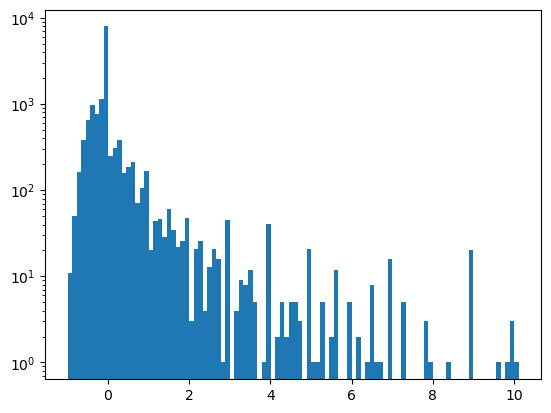

In [44]:
plt.hist(norm_data["normalised_market_value_delta"], bins=100)
# plt.xlim((0, 0.5e8))
plt.yscale("log")

In [90]:
def r2_adj(model, x, y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

def r2_adj2(x, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

In [91]:
X = norm_data.loc[:, norm_data.columns != "normalised_market_value_delta"]
y = norm_data["normalised_market_value_delta"]

In [92]:
X_train = X.loc[X["season_current"] < 2021]
X_test = X.loc[X["season_current"] == 2021]
y_train = y.loc[X["season_current"] < 2021]
y_test = y.loc[X["season_current"] == 2021]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11509, 280), (3149, 280), (11509,), (3149,))

In [94]:
# selectors_train = dict()
# selectors_test = dict()
# for p in ["Goalkeeper", "Attack", "Defender", "Midfield"]:
#     selectors_train[p] = (X_train["position"] == p).values
#     selectors_test[p] = (X_test["position"] == p).values

In [95]:
# goalkeepers = (X["position"] == "Goalkeeper").values
# attackers = (X["position"] == "Attack").values
# defenders = (X["position"] == "Defender").values
# midfielders = (X["position"] == "Midfield").values

# (
#     X_train, X_test, 
#     y_train, y_test, 
#     goalkeepers_train, goalkeepers_test,
#     attackers_train, attackers_test,
#     defenders_train, defenders_test, 
#     midfielders_train, midfielders_test
# ) = train_test_split(
#     X, y, 
#     goalkeepers, attackers, defenders, midfielders,
#     test_size=0.2, random_state=42
# )

In [96]:
random_regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", DummyRegressor()),
    ]
)
random_regression.fit(X_train, y_train)

random_regression.score(X_test, y_test), r2_adj(random_regression, X_test, y_test)

(-2.2341037716921974e-05, -0.09765353193400728)

In [97]:
for name, selector in selectors_test.items():
    print(name, random_regression.score(X_test[selector], y_test[selector]), r2_adj(random_regression, X_test[selector], y_test[selector]))

In [98]:
y_2020 = X_train.loc[X_train["season_current"] == 2020].groupby("player_id_api")["normalised_market_value_delta"].mean()
y_prev = pd.merge(
    y_2020,
    X_test,
    left_index=True,
    right_on="player_id_api",
    how="right"
)["normalised_market_value_delta"].fillna(y_2020.mean())

KeyError: 'Column not found: normalised_market_value_delta'

In [99]:
r2_score(np.exp(y_test), y_prev), r2_adj2(X_test, np.exp(y_test), y_prev)

NameError: name 'y_prev' is not defined

In [78]:
for name, selector in selectors_test.items():
    print(name, r2_score(np.exp(y_test)[selector], y_prev[selector]), r2_adj2(X_test[selector], np.exp(y_test)[selector], y_prev[selector]))

In [100]:
regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", LinearRegression()),
    ]
)
regression.fit(X_train, y_train)

y_reg = regression.predict(X_test)

# regression.score(X_test, y_test), r2_adj(regression, X_test, y_test)
r2_score(y_test, y_reg), r2_adj2(X_test, y_test, y_reg)

(-474457721420940.8, -520778558937629.7)

In [101]:
for name, selector in selectors_test.items():
    y_reg = regression.predict(X_test[selector])
    print(name, r2_score(np.exp(y_test[selector]), np.exp(y_reg)), r2_adj2(X_test[selector], np.exp(y_test[selector]), np.exp(y_reg)))
    # print(name, regression.score(X_test[selector], y_test[selector]), r2_adj(regression, X_test[selector], y_test[selector]))

Only model specific for midfielder is slightly better than the generic one.

In [102]:
from sklearn.neural_network import MLPRegressor

mlp_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp_reg.fit(X_train, y_train)

y_mlp = mlp_reg.predict(X_test)

# mlp_reg.score(X_test, y_test), r2_adj(mlp_reg, X_test, y_test)
r2_score(np.exp(y_test), np.exp(y_mlp)), r2_adj2(X_test, np.exp(y_test), np.exp(y_mlp))

C:\Users\Javi\miniconda3\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(-318317.001718444, -349394.07301592105)

In [103]:
for name, selector in selectors_test.items():
    y_mlp = mlp_reg.predict(X_test[selector])
    print(name, r2_score(np.exp(y_test[selector]), np.exp(y_mlp)), r2_adj2(X_test[selector], np.exp(y_test[selector]), np.exp(y_mlp)))
    # print(name, mlp_reg.score(X_test[selector], y_test[selector]), r2_adj(mlp_reg, X_test[selector], y_test[selector]))

"All positions" model performs better than position specific models.

In [104]:
from xgboost import XGBRegressor

xgboost_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", XGBRegressor()),
    ]
)
xgboost_reg.fit(X_train, y_train)

y_xgboost = xgboost_reg.predict(X_test)


# xgboost_reg.score(X_test, y_test), r2_adj(xgboost_reg, X_test, y_test)
r2_score(y_test, y_xgboost), r2_adj2(X_test, y_test, y_xgboost)

(0.1045707604965237, 0.017150890531051788)

In [105]:
for name, selector in selectors_test.items():
    print(name, xgboost_reg.score(X_test[selector], y_test[selector]), r2_adj(xgboost_reg, X_test[selector], y_test[selector]))

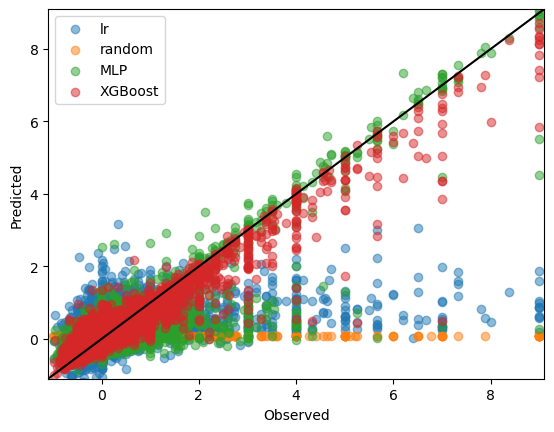

In [106]:
plt.scatter(y_train, regression.predict(X_train), alpha=0.5, label="lr")
plt.scatter(y_test, random_regression.predict(X_test), alpha=0.5, label="random")
plt.scatter(y_train, mlp_reg.predict(X_train), alpha=0.5, label="MLP")
plt.scatter(y_train, xgboost_reg.predict(X_train), alpha=0.5, label="XGBoost")
plt.axline((0, 0), (1, 1), c="k")
plt.xlim(np.floor(y_train.min())-0.1, np.ceil(y_test.max())+0.1)
plt.ylim(np.floor(y_train.min())-0.1, np.ceil(y_test.max())+0.1)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()
_ = plt.show()

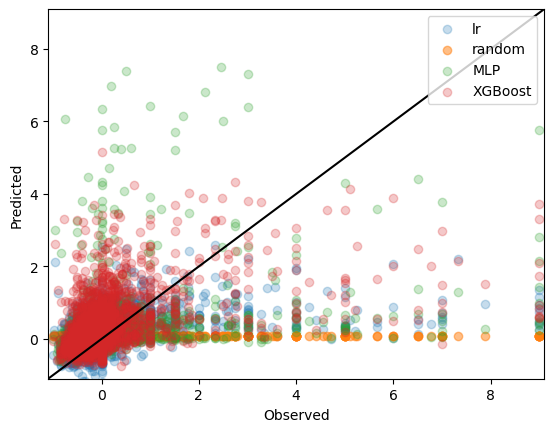

In [107]:
plt.scatter(y_test, regression.predict(X_test), alpha=0.25, label="lr")
plt.scatter(y_test, random_regression.predict(X_test), alpha=0.5, label="random")
plt.scatter(y_test, mlp_reg.predict(X_test), alpha=0.25, label="MLP")
plt.scatter(y_test, xgboost_reg.predict(X_test), alpha=0.25, label="XGBoost")
plt.axline((0, 0), (1, 1), c="k")
plt.xlim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.ylim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()
_ = plt.show()

In [108]:
reg_results = pd.DataFrame({
    "y": np.exp(y_test),
    "y_pred": np.exp(xgboost_reg.predict(X_test))
    # "y": y_test,
    # "y_pred": xgboost_reg.predict(X_test)
})
reg_results["diff"] = reg_results["y_pred"] - reg_results["y"]
reg_results["rel_error"] = reg_results["diff"] / reg_results["y"] * 100
reg_results["abs_rel_error"] = np.abs(reg_results["rel_error"])
reg_results

,y,y_pred,diff,rel_error,abs_rel_error
4,0.535261,0.885345,0.350084,65.404296,65.404296
9,0.662480,1.606914,0.944434,142.560390,142.560390
14,1.000000,1.753147,0.753147,75.314653,75.314653
20,1.000000,0.954200,-0.045800,-4.580015,4.580015
24,1.284025,1.170002,-0.114023,-8.880126,8.880126
...,...,...,...,...,...
14748,1.000000,1.024997,0.024997,2.499676,2.499676
14749,1.000000,1.026773,0.026773,2.677298,2.677298
14750,1.000000,0.997795,-0.002205,-0.220543,0.220543
14751,1.000000,0.997795,-0.002205,-0.220543,0.220543


In [ ]:
reg_results["y"].rank()

In [ ]:
np.mean(reg_results["abs_rel_error"])

In [ ]:
_data = reg_results.loc[reg_results["y"] >= 1_000]
plt.scatter(_data["y"].rank(), _data["rel_error"])
# plt.xscale("log")

In [ ]:
_ = plt.hist(_data["abs_rel_error"], bins=100)

In [ ]:
_data.loc[_data["abs_rel_error"] < 20].sort_values("abs_rel_error")

In [ ]:
_data.sort_values("abs_rel_error")

## Features importance

In [ ]:
result = permutation_importance(
    xgboost_reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

In [ ]:
non_zero_feats = np.abs(result.importances_mean) > 1e-03
forest_importances = pd.Series(result.importances_mean[non_zero_feats], index=X_test.columns.values[non_zero_feats])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std[non_zero_feats], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict change in market value between seasons

In [ ]:
before_after_seasons = pd.merge(
    players_selected_vars, 
    players_selected_vars, 
    on="player_id_api", 
    suffixes=["_before", "_after"]
).query("season_after - season_before == 1")

In [ ]:
numeric_features_ba = [
    f"{c}_{suffix}" for c in [
        "age",
        "matches_played",
        "matches_started",
        "90s_played",
        # "goals_against",
        # "own_goals_against",
        # "shots_on_target_against",
        # "saves",
        # "save%",
        # "saves_inside_box",
        # "penalty_kicks_saves",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
    ]
    for suffix in ["before","after"]
]
numeric_transformer_ba = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_features_ba = [
    f"{c}_{suffix}" for c in [
        "nationality",
        "league",
        "team",
        "tier",
        "position",
    ]
    for suffix in ["before","after"]
]
categorical_transformer_ba = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor_ba = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_ba, numeric_features_ba),
        ("cat", categorical_transformer_ba, categorical_features_ba),
    ]
)

In [ ]:
X = before_after_seasons
y_before = np.digitize(before_after_seasons["normalised_market_value_before"], bins)
y_after = np.digitize(before_after_seasons["normalised_market_value_after"], bins)
y = np.minimum(np.maximum(y_after - y_before, -1), 1)

In [ ]:
goalkeepers = (X["position_before"] == "Goalkeeper").values
attackers = (X["position_before"] == "Attack").values
defenders = (X["position_before"] == "Defender").values
midfielders = (X["position_before"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [ ]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

balanced_accuracy_score(y_test, random.predict(X_test))

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

In [ ]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)

print(confusion_matrix(y_test, clf.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, clf.predict(X_test))

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], clf.predict(X_test[selector])))

"All positions" model performs better on all positions.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(32, 16))),
    ]
)
mlp.fit(X_train, y_train)

print(confusion_matrix(y_test, mlp.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, mlp.predict(X_test))

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], mlp.predict(X_test[selector])))

Only model specific for midfielders perform marginally better.

In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", XGBClassifier()),
    ]
)
xgboost.fit(X_train, y_train+1)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test+1, y_xgboost)

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector]+1, xgboost.predict(X_test[selector])))

XGBoost performs here better than MLP, and comparable as position-specific models.

## Features importance

In [ ]:
result = permutation_importance(
    xgboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()